In [288]:
import pandas as pd
import numpy as np
import math

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from numpy import where
from matplotlib import pyplot

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import plot_roc_curve

In [289]:
features_df = pd.read_csv('data/training_set_features.csv')

In [290]:
labels_df = pd.read_csv('data/training_set_labels.csv')

In [291]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [292]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [293]:
df = pd.merge(labels_df,features_df,on='respondent_id')

In [294]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [295]:
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [296]:
df.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [297]:
df = df.drop(columns=['employment_occupation','employment_industry','health_insurance','respondent_id','h1n1_vaccine',
                 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'])

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seasonal_vaccine             26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

In [299]:
#fill in all Nan values with mode of each column
df = df.fillna(df.mode().iloc[0])

## Train-test splitting

In [300]:
X = df.drop(columns='seasonal_vaccine')
y = df['seasonal_vaccine']

In [301]:
X

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0


In [302]:
col = ['behavioral_antiviral_meds','behavioral_avoidance',
       'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
       'behavioral_outside_home','behavioral_touch_face','doctor_recc_seasonal',
       'chronic_med_condition','child_under_6_months','health_worker','opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults','household_children',
       'x0_35 - 44 Years', 'x0_45 - 54 Years','x0_55 - 64 Years','x0_65+ Years',
       'x1_< 12 Years','x1_College Graduate','x1_Some College','x2_Hispanic','x2_Other or Multiple',
       'x2_White', 'x3_Male', 'x4_> $75,000', 'x4_Below Poverty', 'x5_Not Married', 'x6_Rent', 
       'x7_Not in Labor Force', 'x7_Unemployed', 'x8_bhuqouqj', 'x8_dqpwygqj','x8_fpwskwrf', 'x8_kbazzjca',
       'x8_lrircsnp','x8_lzgpxyit','x8_mlyzmhmf','x8_oxchjgsf', 'x8_qufhixun','x9_MSA, Principle City', 'x9_Non-MSA']

In [303]:
pd.set_option('display.max_columns', None)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [305]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

In [306]:
X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

In [307]:
X_train_clean = pd.concat([nums_df, dums_df], axis=1)

In [308]:
X_train_clean.columns = col

In [309]:
X_train_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
15654,-0.221158,-1.636851,-0.271702,-2.186473,1.334461,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14559,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13752,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,0.691304,-0.662367,1.626998,-0.295743,-0.346856,0.904171,1.667749,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21985,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18196,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,-0.517966,-0.068447,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,-1.246538,-0.822981,0.151710,2.676383,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17289,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,0.509792,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12172,-0.221158,0.610929,3.680505,0.457358,1.334461,1.412257,0.691304,-0.662367,-0.614629,3.381312,-0.346856,0.904171,0.939177,-0.822981,-1.185177,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Test Set

In [310]:
X_test_cat = X_test.select_dtypes('object')

test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

In [311]:
X_test_nums = X_test.select_dtypes('float64')

test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)

In [312]:
X_test_clean = pd.concat([test_nums_df,
                 test_dums_df], axis=1)

In [313]:
X_test_clean.columns = col

In [314]:
X_test_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
25567,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.210606,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6023,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,0.939177,-0.822981,-1.185177,1.593088,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
22055,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,0.691304,1.509737,1.626998,3.381312,-0.346856,0.904171,1.667749,2.195157,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7914,-0.221158,0.610929,-0.271702,-2.186473,1.334461,1.412257,0.691304,1.509737,1.626998,-0.295743,2.883045,-0.022911,1.667749,1.440622,0.151710,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12380,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,1.509737,-0.614629,-0.295743,-0.346856,0.904171,1.667749,-0.068447,0.151710,0.509792,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,2.195157,0.151710,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1060,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,-0.662367,1.626998,-0.295743,-0.346856,-1.877075,-1.246538,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23125,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,-1.446541,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14895,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,1.488596,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SMOTE

In [315]:
# Create the oversampler and undersampler objects
over = SMOTE()
#sampling_strategy=0.8
under = RandomUnderSampler(sampling_strategy=0.9)

# transform the dataset
X_smote, y_smote = under.fit_resample(X_train_clean, y_train)
X_test_smote, y_test_smote= under.fit_resample(X_test_clean, y_test)

In [316]:
# Check the class distribution of the target
counter = Counter(y_train)
test_counter = Counter(y_test_smote)
print(counter)
print(test_counter)

Counter({0: 10633, 1: 9397})
Counter({0: 3375, 1: 3038})


## 1st Model:  Dummy Classifier

In [317]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [318]:
dummy_clf.fit(X_train_clean, y_train)

DummyClassifier(strategy='most_frequent')

In [319]:
dummy_clf.predict(X_train_clean)[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Dummy Model Evaluation

In [320]:
cv_results = cross_val_score(dummy_clf, X_train_clean, y_train, cv=10)
cv_results.mean()

0.5308537194208686

### Confusion Matrix

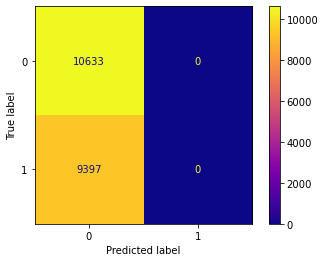

In [321]:
plot_confusion_matrix(dummy_clf, X_train_clean, y_train, cmap="plasma");

In [322]:
confusion_matrix(y_train, dummy_clf.predict(X_train_clean))

array([[10633,     0],
       [ 9397,     0]])

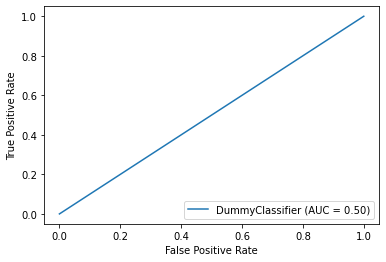

In [323]:
plot_roc_curve(dummy_clf, X_train_clean, y_train);

## 2nd Model: Logistic Regression 

In [324]:
first_logreg_model = LogisticRegression(random_state=1, penalty='none')

In [325]:
first_logreg_model.fit(X_train_clean, y_train)

LogisticRegression(penalty='none', random_state=1)

In [326]:
y_pred = first_logreg_model.predict(X_train_clean)

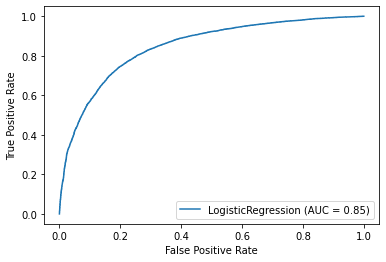

In [327]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)

## 2nd Model Evaluation

In [328]:
cv_logregresults = cross_val_score(first_logreg_model, X_train_clean, y_train, cv=10)

cv_logregresults.mean()

0.7735396904643036

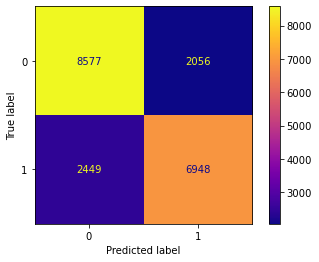

In [329]:
plot_confusion_matrix(first_logreg_model, X_train_clean, y_train, cmap="plasma");

In [330]:
confusion_matrix(y_train, first_logreg_model.predict(X_train_clean))

array([[8577, 2056],
       [2449, 6948]])

In [331]:
precision_score(y_train, y_pred)

0.7716570413149711

In [332]:
accuracy_score(y_train, y_pred)

0.7750873689465801

In [153]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     10633
           1       0.77      0.74      0.76      9397

    accuracy                           0.78     20030
   macro avg       0.77      0.77      0.77     20030
weighted avg       0.77      0.78      0.77     20030



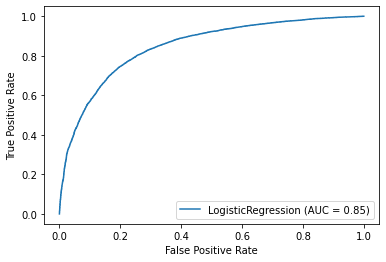

In [154]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)

# Decision Tree

In [178]:
from sklearn.tree import DecisionTreeClassifier


In [179]:
ct = DecisionTreeClassifier(max_depth=2, random_state=42)

ct.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [180]:
ct.score(X_test_clean, y_test)

0.7323648345065149

In [197]:
param_dict ={"max_depth":range(1,10),
             "min_samples_split":[100,500,1000,5000],"min_samples_leaf":[100,500,1000,5000]}

In [198]:
# Define the parameter grid
gs = GridSearchCV(ct, param_grid=param_dict, cv=5,verbose=1,n_jobs=-1)

In [199]:
gs.fit(X_train_clean, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   24.7s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': [100, 500, 1000, 5000],
                         'min_samples_split': [100, 500, 1000, 5000]},
             verbose=1)

In [200]:
gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 100, 'min_samples_split': 100}

In [185]:
gs.best_score_

0.7556165751372941

In [186]:
gs.best_estimator_.score(X_test_clean, y_test)

0.7665119065448555

In [187]:
gs.cv_results_

{'mean_fit_time': array([0.08996181, 0.10404458, 0.06901274, 0.0747963 , 0.07636356,
        0.07631416, 0.06259875, 0.07044015, 0.06915236, 0.03687081,
        0.08069854, 0.09623475, 0.06986289, 0.06146917, 0.06181974,
        0.05461607, 0.05426402, 0.05398793, 0.03697262, 0.04994082,
        0.0565804 , 0.04967432, 0.06512599, 0.0716156 , 0.07605615,
        0.07381663, 0.10940633, 0.0423882 , 0.07498298, 0.05975213,
        0.05630884, 0.05808787, 0.06063161, 0.05416751, 0.05630312,
        0.05299706, 0.03890805, 0.07686419, 0.07750096, 0.07886796,
        0.07727594, 0.07012463, 0.07362785, 0.07335896, 0.07127233,
        0.02984586, 0.07758088, 0.07858844, 0.08448238, 0.09600396,
        0.09878764, 0.07994337, 0.08192577, 0.0816628 , 0.03976078,
        0.09115152, 0.1078886 , 0.10172429, 0.10967383, 0.09163952,
        0.09231358, 0.08429437, 0.07882519, 0.02791829, 0.08359456,
        0.07165222, 0.09322119, 0.14208922, 0.15242   , 0.10069203,
        0.11956058, 0.11521516,

In [176]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112594,0.023195,0.000000,0.000000,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,468
1,0.136061,0.059627,0.025579,0.014355,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.684723,0.675237,0.6665,0.677733,0.685472,0.677933,0.006942,257
2,0.088308,0.021571,0.012832,0.002531,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.684723,0.675237,0.6665,0.677733,0.685472,0.677933,0.006942,257
3,0.072251,0.022684,0.011428,0.003095,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.684723,0.675237,0.6665,0.677733,0.685472,0.677933,0.006942,257
4,0.079169,0.012692,0.011369,0.000874,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.684723,0.675237,0.6665,0.677733,0.685472,0.677933,0.006942,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.025173,0.006064,0.000000,0.000000,entroy,9,4,5,"{'criterion': 'entroy', 'max_depth': 9, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,384
644,0.032265,0.009806,0.000000,0.000000,entroy,9,4,6,"{'criterion': 'entroy', 'max_depth': 9, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,386
645,0.028008,0.011030,0.000000,0.000000,entroy,9,4,7,"{'criterion': 'entroy', 'max_depth': 9, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,389
646,0.036549,0.009733,0.000000,0.000000,entroy,9,4,8,"{'criterion': 'entroy', 'max_depth': 9, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,542


In [203]:
ct2 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=100, random_state=42)

ct2.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=100,
                       random_state=42)

In [204]:
y_pred = ct2.predict(X_test_clean)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [205]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 77.02561030402876


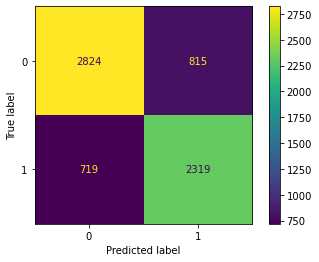

In [207]:
plot_confusion_matrix(ct2, X_test_clean, y_test);

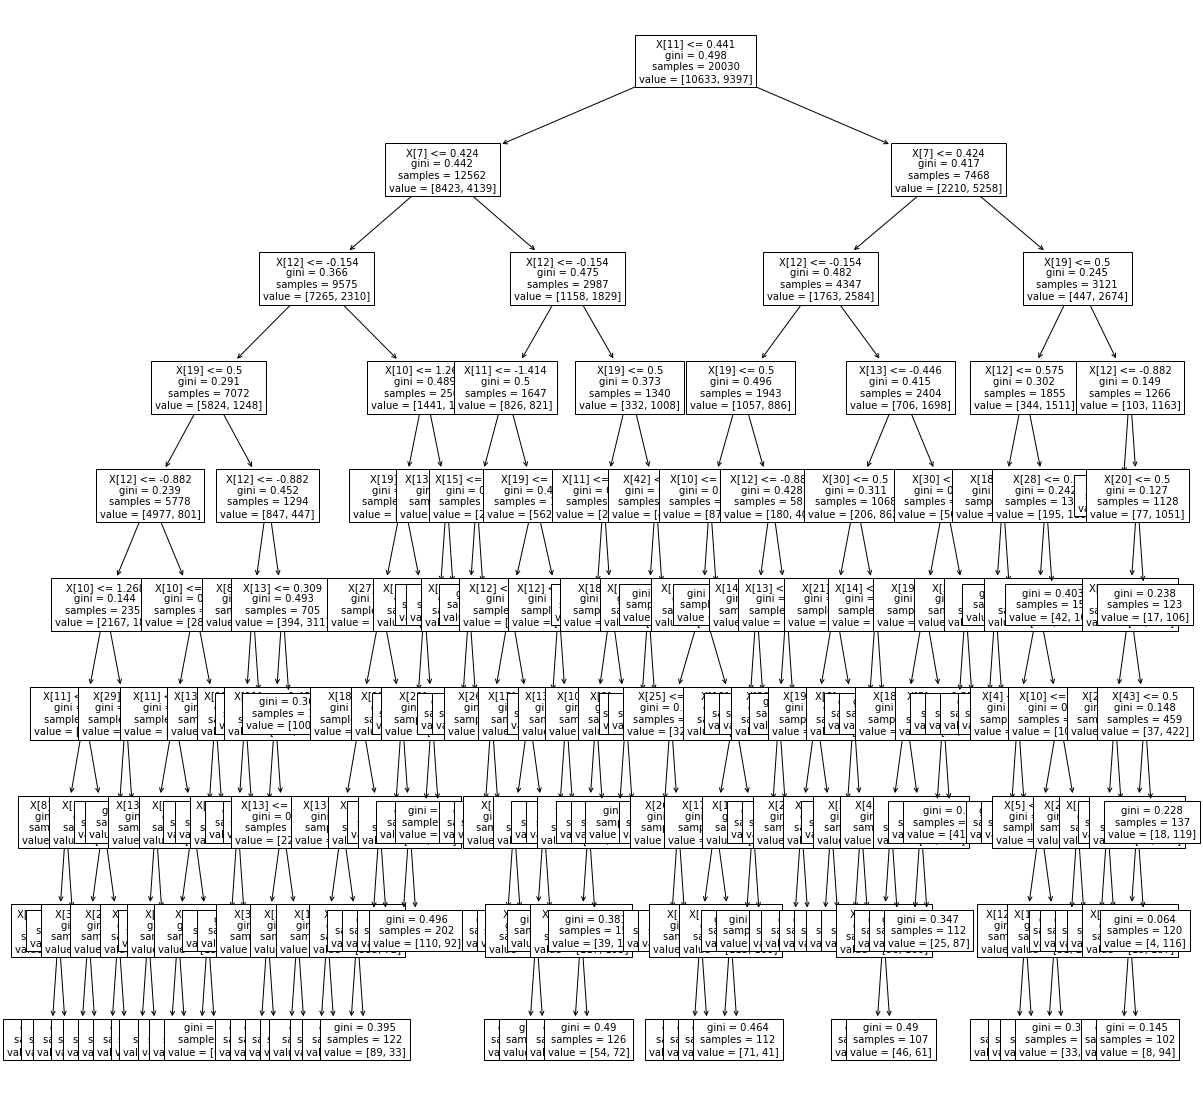

In [217]:
f, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(ct2, ax=ax, fontsize=10)
plt.show()

# Best Feature

[0.00825823 0.02064312 0.01033326 0.01453657 0.02284388 0.02260876
 0.02037632 0.0830119  0.022418   0.01188622 0.01883974 0.08863607
 0.10493968 0.04227638 0.03306419 0.02689866 0.01183224 0.01382886
 0.01510565 0.0384555  0.01023645 0.01873458 0.01868536 0.00689564
 0.00719855 0.0152948  0.02451252 0.01927922 0.01091094 0.02180861
 0.01578594 0.02024558 0.00769666 0.01499846 0.0080695  0.01521333
 0.01486888 0.01241359 0.01754975 0.0117006  0.01539867 0.01561293
 0.02365285 0.02244336]


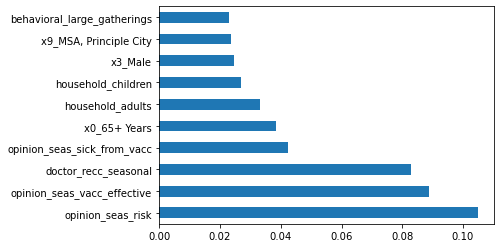

In [282]:
X = X_train_clean
y = y_train
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()